In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None)
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

In [2]:
#link to dataset and context
#https://www.kaggle.com/datasets/mahirahmzh/starbucks-customer-retention-malaysia-survey

#link to my video that explains this analysis:
#https://drive.google.com/drive/folders/1DUw8DkCcvCtE4YSsbMG9Zf_vpRzjwl8w?usp=drive_link

raw_survey = pd.read_csv('Cluster Analysis/survey_starbucks.csv')
print(raw_survey.shape)
raw_survey.head()

(122, 21)


,Timestamp,1. Your Gender,2. Your Age,3. Are you currently....?,4. What is your annual income?,5. How often do you visit Coffee House?,6. How do you usually enjoy Coffee House?,7. How much time do you normally spend during your visit?,8. The nearest Coffee House's outlet to you is...?,9. Do you have Coffee House membership card?,10. What do you most frequently purchase at Coffee House?,"11. On average, how much would you spend at Coffee House per visit?","12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:",13. How would you rate the price range at Coffee House?,14. How important are sales and promotions in your purchase decision?,"15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)",16. You rate the WiFi quality at Coffee House as..,"17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)",18. How likely you will choose Coffee House for doing business meetings or hangout with friends?,19. How do you come to hear of promotions at Coffee House? Check all that apply.,20. Will you continue buying Coffee House?
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [3]:
#Find out the unique identifier
raw_survey['Timestamp'].nunique() == len(raw_survey)

True

## Understand what features the variables have

In [4]:
#mechanism that displays the features pertaining to the variables in the dataset
unique_values = raw_survey.iloc[:,1:].apply(pd.Series.unique)

# Printing the unique values for each column
for column, values in unique_values.items():
    print(f"Column '{column}':")
    print(values)
    print()


Column '1. Your Gender':
['Female' 'Male']

Column '2. Your Age':
['From 20 to 29' 'From 30 to 39' '40 and above' 'Below 20']

Column '3. Are you currently....?':
['Student' 'Employed' 'Self-employed' 'Housewife']

Column '4. What is your annual income?':
['Less than RM25,000' 'RM50,000 - RM100,000' 'RM25,000 - RM50,000'
 'RM100,000 - RM150,000' 'More than RM150,000']

Column '5. How often do you visit Coffee House?':
['Rarely' 'Monthly' 'Weekly' 'Never' 'Daily']

Column '6. How do you usually enjoy Coffee House?':
['Dine in' 'Take away' 'Drive-thru' 'never' 'Never buy' nan
 'I dont like coffee' 'Never']

Column '7. How much time do you normally  spend during your visit?':
['Between 30 minutes to 1 hour' 'Below 30 minutes' 'More than 3 hours'
 'Between 1 hour to 2 hours' 'Between 2 hours to 3 hours']

Column '8. The nearest Coffee House's outlet to you is...?':
['within 1km' '1km - 3km' 'more than 3km']

Column '9. Do you have Coffee House membership card?':
['Yes' 'No']

Column '10. W

## Rename Column names for ease of analysis

In [5]:
#change the variables to shorter/logical names
#next time would be better to change names based on location of columns instead of copying names

names_to_change = ['1. Your Gender', '2. Your Age', '3. Are you currently....?',
                  '4. What is your annual income?','5. How often do you visit Coffee House?','6. How do you usually enjoy Coffee House?',
                  '7. How much time do you normally  spend during your visit?','8. The nearest Coffee House\'s outlet to you is...?','9. Do you have Coffee House membership card?',
                  '10. What do you most frequently purchase at Coffee House?','11. On average, how much would you spend at Coffee House per visit?','12. How would you rate the quality of Coffee House compared to other brands (Coffee Bean, Old Town White Coffee..) to be:',
                  '13. How would you rate the price range at Coffee House?','14. How important are sales and promotions in your purchase decision?','15. How would you rate the ambiance at Coffee House? (lighting, music, etc...)',
                  '16. You rate the WiFi quality at Coffee House as..','17. How would you rate the service at Coffee House? (Promptness, friendliness, etc..)','18. How likely you will choose Coffee House for doing business meetings or hangout with friends?',
                '19. How do you come to hear of promotions at Coffee House? Check all that apply.','20. Will you continue buying Coffee House?']


new_variable_names = ['gender', 'age', 'life_status',
                    'income', 'visit_frequency', 'experience_type',
                   'length_of_stay','proximity','membership',
                   'product_mix','avg_spend','quality_rating',
                   'price_rating','promotion_influence','vibe_rating',
                   'wifi_rating','customer_service','recommendation',
                   'promotion','continued_customer'] 

#skeleton dictionary
dictionary_change = {}

#assign the new column names to the survey questions
for column_name, new_name, in zip(names_to_change,new_variable_names):
    
    #assign the values
    dictionary_change[column_name] = new_name

#rename the columns    
raw_survey.rename(columns = dictionary_change, inplace= True)

#display head
raw_survey.head()

,Timestamp,gender,age,life_status,income,visit_frequency,experience_type,length_of_stay,proximity,membership,product_mix,avg_spend,quality_rating,price_rating,promotion_influence,vibe_rating,wifi_rating,customer_service,recommendation,promotion,continued_customer
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [6]:
#remove the data responses that state they spend zero RMs on coffee house (question 11); we are only interested in respondents that spend at Starbucks
starbucks_spenders = raw_survey[raw_survey['avg_spend'] != 'Zero'].copy()

#remove the respondents that stated they never visit
starbucks_spenders = starbucks_spenders[starbucks_spenders['visit_frequency'] != 'Never']

#display dataframe information
print(starbucks_spenders.shape)
starbucks_spenders.head()

(108, 21)


,Timestamp,gender,age,life_status,income,visit_frequency,experience_type,length_of_stay,proximity,membership,product_mix,avg_spend,quality_rating,price_rating,promotion_influence,vibe_rating,wifi_rating,customer_service,recommendation,promotion,continued_customer
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [7]:
#check to see if there is missing data
starbucks_spenders.isna().sum()

Timestamp              0
gender                 0
age                    0
life_status            0
income                 0
visit_frequency        0
experience_type        0
length_of_stay         0
proximity              0
membership             0
product_mix            0
avg_spend              0
quality_rating         0
price_rating           0
promotion_influence    0
vibe_rating            0
wifi_rating            0
customer_service       0
recommendation         0
promotion              0
continued_customer     0
dtype: int64

In [8]:
#check to see if columns are aligned with their theoritical data types
starbucks_spenders.dtypes

Timestamp              object
gender                 object
age                    object
life_status            object
income                 object
visit_frequency        object
experience_type        object
length_of_stay         object
proximity              object
membership             object
product_mix            object
avg_spend              object
quality_rating          int64
price_rating            int64
promotion_influence     int64
vibe_rating             int64
wifi_rating             int64
customer_service        int64
recommendation          int64
promotion              object
continued_customer     object
dtype: object

## Descriptive Analytics 


#### It seems that within our sample, almost half of the respondents are more than 3Kms away from a physical location. There does not seem to be any relationship between spend and proximity of locations. Most respondents spend Less than RM20 regardless of distance. In addition, more than half of the resondents spend less than RM20 per visit and over 90% of respondents spend between less than or equal to RM40 per visit. 

#### When it comes to the user experience over 80% of the respondents either Dine-In or Take-out. There does not seem to be a relationship between user experience and the amount they spend. Initial hypothesis was that people who dine-in would spend more because they are staying longer. For those that Dine-In, about 47% spend between 30 minutes to 1 hour.

#### Respondents were asked to rate certain experiences/products in the survey and most of them provided a rating above 3.5 out 4.0. However, respondents provided an average rating of 3.0 on the price ranges on the products offered at Starbucks. 

In [9]:
#create function that creates bar graphs
def bar_graph(df, column_name, title):
    df[column_name].value_counts(normalize=True).plot.bar(edgecolor='black')
    plt.xticks(rotation=45)
    plt.ylabel('Percentage');
    plt.title(title);
    plt.show()

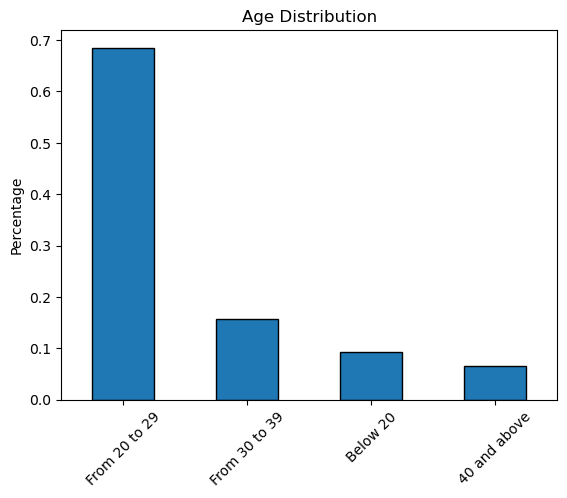

In [10]:
#what is the distribution of age?
bar_graph(starbucks_spenders,'age','Age Distribution')

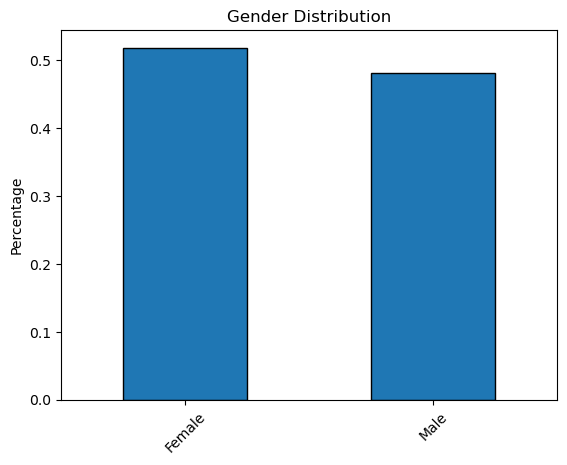

In [11]:
#what is the distribution of gender?
bar_graph(starbucks_spenders,'gender','Gender Distribution')

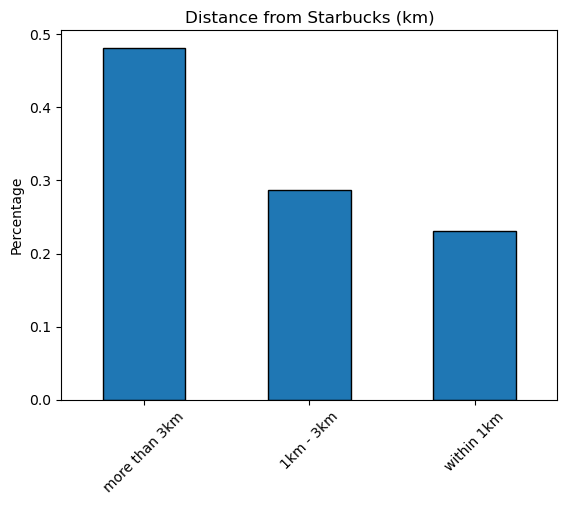

In [12]:
#How far are physical locations from respondents?
bar_graph(starbucks_spenders,'proximity','Distance from Starbucks (km)')

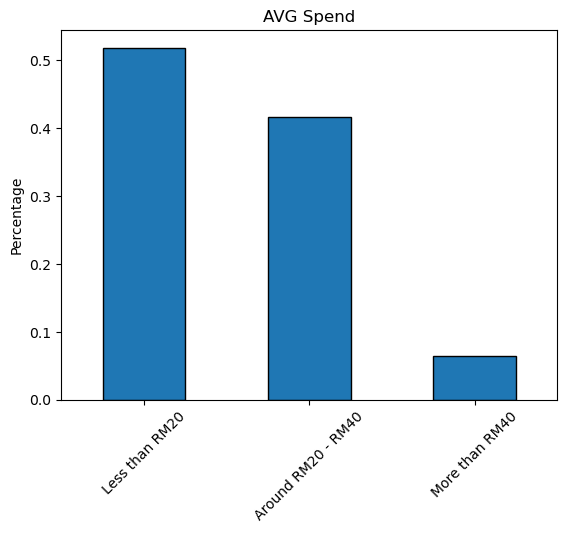

In [13]:
bar_graph(starbucks_spenders,'avg_spend','AVG Spend')

In [14]:
#what group spends the most money in terms of distance , is it people who live close (on average)
spend_by_distance = pd.crosstab(starbucks_spenders['proximity'],starbucks_spenders['avg_spend'],
            starbucks_spenders['Timestamp'],aggfunc = 'count', normalize='index') *100

# Define the desired order of index names based on a list
desired_index_order = ['within 1km', '1km - 3km', 'more than 3km']

# Reindex the grouped data based on the desired order of index names
spend_by_distance = spend_by_distance.reindex(desired_index_order, level=0)

# Define the desired order of columns based on a list
desired_column_order = ['Less than RM20', 'Around RM20 - RM40', 'More than RM40']

# Reindex the grouped data based on the desired order of columns
spend_by_distance = spend_by_distance.reindex(desired_column_order, axis=1)

spend_by_distance

avg_spend,Less than RM20,Around RM20 - RM40,More than RM40
proximity,,,
within 1km,48.000000,52.000000,0.000000
1km - 3km,54.838710,35.483871,9.677419
more than 3km,51.923077,40.384615,7.692308


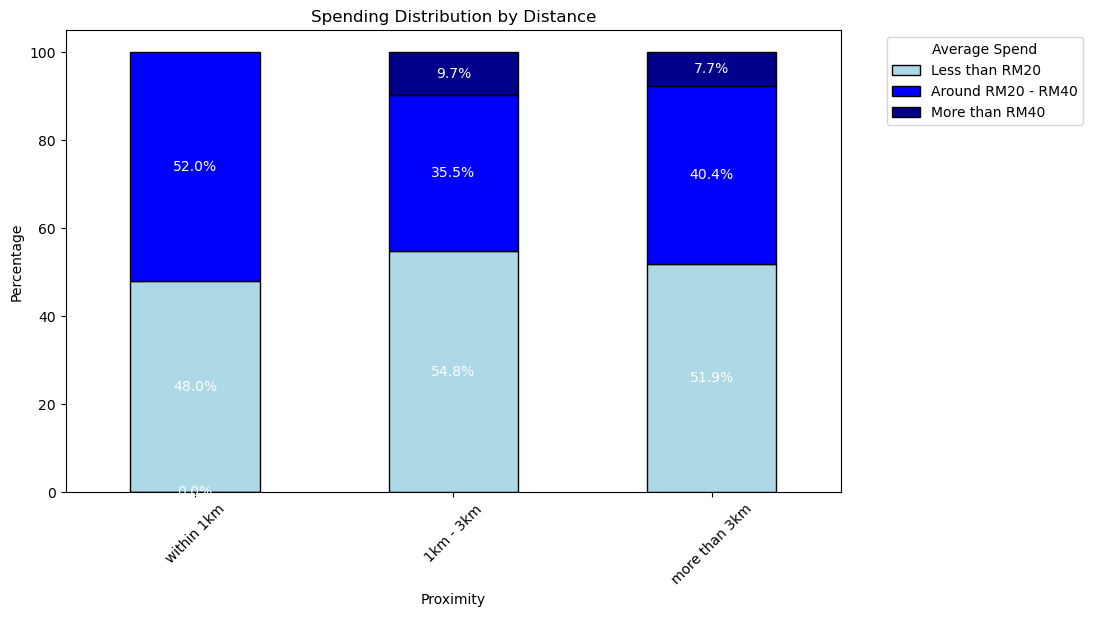

In [15]:

# Define the custom list of colors
colors = ['#ADD8E6', '#0000FF', '#00008B']

# Plot the cross-tabulation data with a blue color scheme
ax = spend_by_distance.plot(kind='bar', stacked=True, figsize=(10, 6), color=colors, edgecolor='black')

# Set the plot title and labels
plt.title('Spending Distribution by Distance')
plt.xlabel('Proximity')
plt.ylabel('Percentage')
plt.xticks(rotation=45)

# Move the legend outside of the graph
plt.legend(title='Average Spend', bbox_to_anchor=(1.05, 1), loc='upper left')

# Add percentage values on top of each bar
for p in ax.patches:
    width, height = p.get_width(), p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.1f}%', (x + width/2, y + height/2), ha='center', va='center',color='white')

# Display the plot
plt.show()


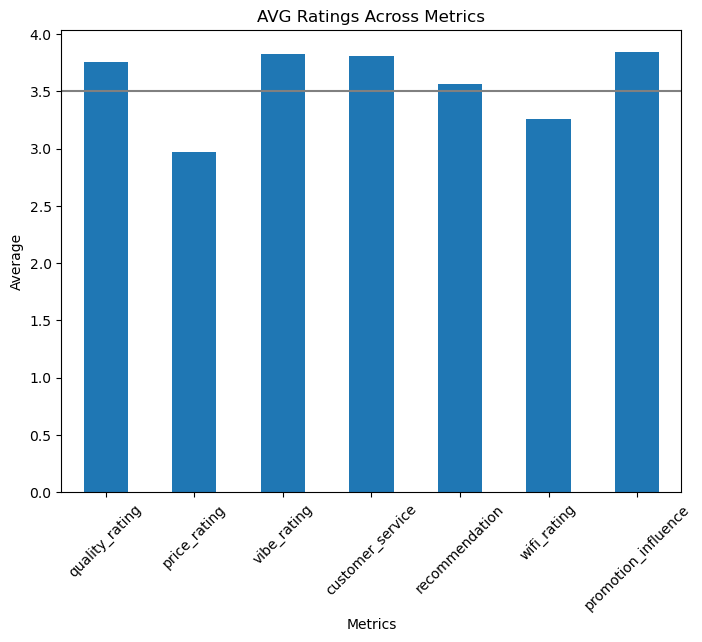

In [16]:
#plot the data for avg ratings across the variables that are integers
# Calculate the average of each column
averages = []
columns = ['quality_rating', 'price_rating', 'vibe_rating', 'customer_service','recommendation','wifi_rating','promotion_influence']

for column in columns:
    avg = starbucks_spenders[column].mean()
    averages.append(avg)

# Create a DataFrame to store the averages
averages_df = pd.DataFrame({'Average': averages}, index=columns)

# Plot the averages
averages_df.plot(kind='bar', figsize=(8, 6))

plt.axhline(y=3.5, color='gray', linestyle='-')
plt.legend().set_visible(False)


# Set the plot title and labels
plt.title('AVG Ratings Across Metrics')
plt.xlabel('Metrics')
plt.xticks(rotation=45)
plt.ylabel('Average')

# Display the plot
plt.show()

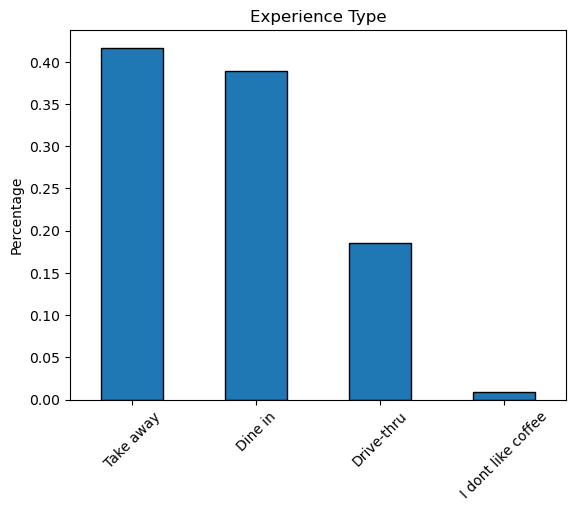

In [17]:
#experience type, whats the breakdown on (stacked bar) of experience type - are more people spending time or are they picking up and how does that look on proximity
bar_graph(starbucks_spenders,'experience_type','Experience Type')

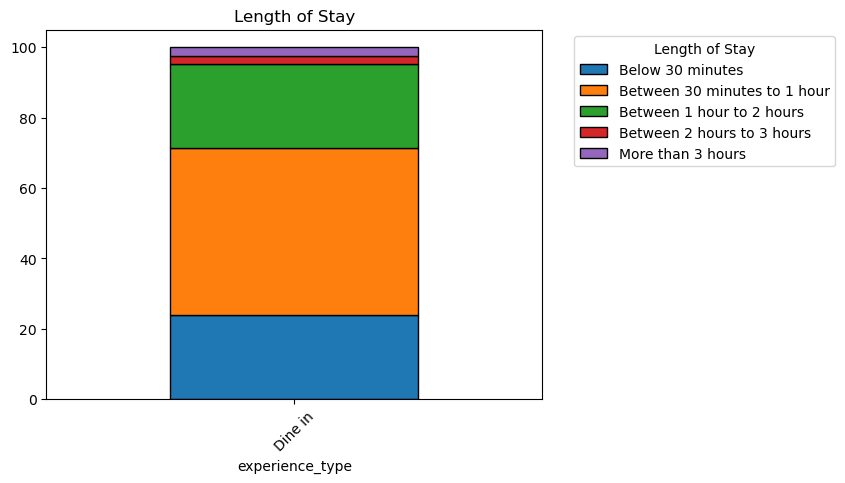

In [18]:
#stack bar to show how long customers who dine-in stay at starbucks

experience_by_stay = pd.crosstab(starbucks_spenders['experience_type'],starbucks_spenders['length_of_stay'],
           starbucks_spenders['Timestamp'],aggfunc = 'count', normalize='index') *100


# Define the desired order of index names based on a list
desired_column_order = ['Below 30 minutes', 'Between 30 minutes to 1 hour', 'Between 1 hour to 2 hours',
                       'Between 2 hours to 3 hours','More than 3 hours']

# Reindex the grouped data based on the desired order of index names
experience_by_stay = experience_by_stay.reindex(desired_column_order, axis=1)


experience_by_stay = experience_by_stay.loc[['Dine in']]

experience_by_stay.plot(kind='bar', stacked=True, edgecolor='black');


plt.legend(title='Length of Stay', bbox_to_anchor=(1.05, 1), loc='upper left');
plt.xticks(rotation=45);
plt.title('Length of Stay');

### Hot One-Encode Categorical Variables

### Mode peformances will differ due to random seed positioning, number of clusters used, input variables, transformation of variables. Sometimes using the same clusters,random seed, but changing how the variables are transformed could lead to different results. The idea is to find the most optimal model that forms clusters that are highly interpretable and provide business value. Using this survey to segment customers will provide Starbucks decision makers wih valuable charactersitcs regarding their customers to retain and advertise to them. 


In [19]:
print(starbucks_spenders.shape)
starbucks_spenders['product_mix'].value_counts()

(108, 21)


Coffee                                           59
Cold drinks                                      22
Coffee;Cold drinks                                6
Coffee;Pastries                                   6
Coffee;Sandwiches                                 3
Cold drinks;Juices;Pastries                       2
Pastries                                          2
Cold drinks;Pastries                              1
Cold drinks;Pastries;Sandwiches                   1
Coffee;Juices;Pastries;Sandwiches                 1
Coffee;Pastries;Sandwiches                        1
Coffee;Cold drinks;Pastries;Sandwiches            1
Jaws chip                                         1
cake                                              1
Coffee;Cold drinks;Juices;Pastries;Sandwiches     1
Name: product_mix, dtype: int64

In [20]:
#decision to remove the jaws chip, cake, and pastries responses from analysis
irrelavant_products = ['Jaws chip','cake','Pastries']
starbucks_spenders = starbucks_spenders[~starbucks_spenders['product_mix'].isin(irrelavant_products)]
print(starbucks_spenders.shape)
starbucks_spenders.head()

(104, 21)


,Timestamp,gender,age,life_status,income,visit_frequency,experience_type,length_of_stay,proximity,membership,product_mix,avg_spend,quality_rating,price_rating,promotion_influence,vibe_rating,wifi_rating,customer_service,recommendation,promotion,continued_customer
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes


In [21]:
#domain knowledge on what is important to include in a variable
food_plus_beverage = ['Cold drinks;Pastries','Coffee;Sandwiches','Cold drinks;Pastries;Sandwiches',
                     'Coffee;Juices;Pastries;Sandwiches','Coffee;Pastries;Sandwiches','Coffee;Pastries',
                     'Cold drinks;Juices;Pastries','Coffee;Cold drinks;Pastries;Sandwiches','Coffee;Cold drinks;Juices;Pastries;Sandwiches'] 

#beverage only 
beverage_only = ['Coffee', 'Cold drinks', 'Coffee;Cold drinks']

#create the new columns
starbucks_spenders['food_plus_beverage'] = 0
starbucks_spenders['beverage_only'] = 0


#apply the conditions
starbucks_spenders['food_plus_beverage'] = np.where(starbucks_spenders['product_mix'].isin(food_plus_beverage), 1, starbucks_spenders['food_plus_beverage'])
starbucks_spenders['beverage_only'] = np.where(starbucks_spenders['product_mix'].isin(beverage_only), 1, starbucks_spenders['beverage_only'])

starbucks_spenders.head()

,Timestamp,gender,age,life_status,income,visit_frequency,experience_type,length_of_stay,proximity,membership,product_mix,avg_spend,quality_rating,price_rating,promotion_influence,vibe_rating,wifi_rating,customer_service,recommendation,promotion,continued_customer,food_plus_beverage,beverage_only
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,Yes,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,0,1
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,Yes,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes,1,0
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,Yes,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes,0,1
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,No,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No,0,1
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,No,Coffee;Sandwiches,Around RM20 - RM40,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes,1,0


In [22]:
#another cut is to see specific product preferences
starbucks_spenders['coffe_drinkers'] = 0
starbucks_spenders['juice_drinkers'] = 0

#create new variables by iterating through dataframe
for index, row in starbucks_spenders.iterrows():
    
    if 'Cold drinks' in row['product_mix']:
        # print(True)
        starbucks_spenders.at[index, 'juice_drinkers'] = 1

    
    if 'Coffee' in row['product_mix']:
        # print(True)
        starbucks_spenders.at[index, 'coffe_drinkers'] = 1


In [23]:
starbucks_spenders[['food_plus_beverage','beverage_only']].sum()

food_plus_beverage    17
beverage_only         87
dtype: int64

In [24]:
starbucks_spenders['membership'].value_counts()

Yes    57
No     47
Name: membership, dtype: int64

In [25]:
#change the membership column to binary
starbucks_spenders['membership'] = starbucks_spenders['membership'].apply(lambda x: 1 if x == 'Yes' else 0)

In [26]:
starbucks_spenders['proximity'].value_counts()

more than 3km    50
1km - 3km        31
within 1km       23
Name: proximity, dtype: int64

In [27]:
starbucks_spenders['length_of_stay'].value_counts()

Below 30 minutes                58
Between 30 minutes to 1 hour    32
Between 1 hour to 2 hours       12
More than 3 hours                2
Name: length_of_stay, dtype: int64

In [28]:
#given that the more than 3 hours has only 2 records, we can remove them from the analysis
starbucks_spenders = starbucks_spenders[starbucks_spenders['length_of_stay'] != 'More than 3 hours']
starbucks_spenders['length_of_stay'].value_counts()

Below 30 minutes                58
Between 30 minutes to 1 hour    32
Between 1 hour to 2 hours       12
Name: length_of_stay, dtype: int64

In [29]:
#it would make sense to club more than 150k and 100k-150k into a new category labeled more than 100k (7 records in total)
starbucks_spenders['income'].value_counts()

Less than RM25,000       59
RM25,000 - RM50,000      20
RM50,000 - RM100,000     16
More than RM150,000       4
RM100,000 - RM150,000     3
Name: income, dtype: int64

In [30]:
#club together features
starbucks_spenders['income'] = starbucks_spenders['income'].apply(lambda x: 'More than RM50,000' if (x == 'RM50,000 - RM100,000' or x == 'RM100,000 - RM150,000' or x == 'More than RM150,000') else x)
starbucks_spenders['income'].value_counts()

Less than RM25,000     59
More than RM50,000     23
RM25,000 - RM50,000    20
Name: income, dtype: int64

In [31]:
#visit frequency follows a logical order 
starbucks_spenders['visit_frequency'].value_counts()

Rarely     67
Monthly    24
Weekly      9
Daily       2
Name: visit_frequency, dtype: int64

In [32]:
#club together features so that we have 3 categories
starbucks_spenders['visit_frequency'] = starbucks_spenders['visit_frequency'].apply(lambda x: 'Frequently' if (x == 'Weekly' or x == 'Daily') else x)
starbucks_spenders['visit_frequency'].value_counts()


Rarely        67
Monthly       24
Frequently    11
Name: visit_frequency, dtype: int64

In [33]:
#analyze the features
starbucks_spenders['avg_spend'].value_counts()

Less than RM20        54
Around RM20 - RM40    41
More than RM40         7
Name: avg_spend, dtype: int64

In [34]:
#club together features, this column will be one hot encoded
starbucks_spenders['avg_spend'] = starbucks_spenders['avg_spend'].apply(lambda x: 'More than RM20' if (x == 'Around RM20 - RM40' or x == 'More than RM40') else x)
starbucks_spenders['avg_spend'].value_counts()

Less than RM20    54
More than RM20    48
Name: avg_spend, dtype: int64

In [35]:
#create numerical variables from the ordinal categorical variables

#proximity
proximity_conditions = [starbucks_spenders['proximity'] == 'within 1km',starbucks_spenders['proximity'] == '1km - 3km',starbucks_spenders['proximity'] == 'more than 3km']
proximity_transformations = [1,2,3]

#length of stay
length_conditions = [starbucks_spenders['length_of_stay'] == 'Below 30 minutes',starbucks_spenders['length_of_stay'] == 'Between 30 minutes to 1 hour',
                        starbucks_spenders['length_of_stay'] == 'Between 1 hour to 2 hours']

length_transformations = [1,2,3]

#income
income_conditions = [starbucks_spenders['income'] == 'Less than RM25,000',starbucks_spenders['income'] == 'RM25,000 - RM50,000',
                        starbucks_spenders['income'] == 'RM50,000 - RM100,000', starbucks_spenders['income'] == 'More than RM100,000' ]

income_transformations = [1,2,3,4]


#visit frequency, higher value indicates a more frequent customer
visit_conditions = [starbucks_spenders['visit_frequency'] == 'Rarely',starbucks_spenders['visit_frequency'] == 'Monthly',
                        starbucks_spenders['visit_frequency'] == 'Frequently' ]

visit_transformations = [1,2,3]

#apply the conditions to the respective categorical variables
starbucks_spenders['num_proximity'] =  np.select(proximity_conditions,proximity_transformations)
starbucks_spenders['num_length_of_stay'] =  np.select(length_conditions,length_transformations)
starbucks_spenders['num_income'] =  np.select(income_conditions,income_transformations)
starbucks_spenders['num_visits'] =  np.select(visit_conditions,visit_transformations)


#display
starbucks_spenders.head()

,Timestamp,gender,age,life_status,income,visit_frequency,experience_type,length_of_stay,proximity,membership,product_mix,avg_spend,quality_rating,price_rating,promotion_influence,vibe_rating,wifi_rating,customer_service,recommendation,promotion,continued_customer,food_plus_beverage,beverage_only,coffe_drinkers,juice_drinkers,num_proximity,num_length_of_stay,num_income,num_visits
0,2019/10/01 12:38:43 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Dine in,Between 30 minutes to 1 hour,within 1km,1,Coffee,Less than RM20,4,3,5,5,4,4,3,Starbucks Website/Apps;Social Media;Emails;Dea...,Yes,0,1,1,0,1,2,1,1
1,2019/10/01 12:38:54 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,1km - 3km,1,Cold drinks;Pastries,Less than RM20,4,3,4,4,4,5,2,Social Media;In Store displays,Yes,1,0,0,1,2,1,1,1
2,2019/10/01 12:38:56 PM GMT+8,Male,From 20 to 29,Employed,"Less than RM25,000",Monthly,Dine in,Between 30 minutes to 1 hour,more than 3km,1,Coffee,Less than RM20,4,3,4,4,4,4,3,In Store displays;Billboards,Yes,0,1,1,0,3,2,1,2
3,2019/10/01 12:39:08 PM GMT+8,Female,From 20 to 29,Student,"Less than RM25,000",Rarely,Take away,Below 30 minutes,more than 3km,0,Coffee,Less than RM20,2,1,4,3,3,3,3,Through friends and word of mouth,No,0,1,1,0,3,1,1,1
4,2019/10/01 12:39:20 PM GMT+8,Male,From 20 to 29,Student,"Less than RM25,000",Monthly,Take away,Between 30 minutes to 1 hour,1km - 3km,0,Coffee;Sandwiches,More than RM20,3,3,4,2,2,3,3,Starbucks Website/Apps;Social Media,Yes,1,0,1,0,2,2,1,2


## Hot One-Encode the categorical variables

In [36]:
# begin to hot one-encode variables of interest
categorical_variables = ['age','life_status','experience_type', 'avg_spend','gender','income']

#create the dataframe with hot one encoding
model_data_set = pd.get_dummies(starbucks_spenders, columns=categorical_variables)


#change position of membership column to end of dataframe
column_to_move = model_data_set.pop('membership')  # Remove the column from the DataFrame and store it in a variable
model_data_set['membership'] = column_to_move  # Reassign the column to the DataFrame, placing it at the end

column_to_move = model_data_set.pop('food_plus_beverage')  # Remove the column from the DataFrame and store it in a variable
model_data_set['food_plus_beverage'] = column_to_move  # Reassign the column to the DataFrame, placing it at the end

column_to_move = model_data_set.pop('beverage_only')  # Remove the column from the DataFrame and store it in a variable
model_data_set['beverage_only'] = column_to_move  # Reassign the column to the DataFrame, placing it at the end


column_to_move = model_data_set.pop('coffe_drinkers')  # Remove the column from the DataFrame and store it in a variable
model_data_set['coffe_drinkers'] = column_to_move  # Reassign the column to the DataFrame, placing it at the end

column_to_move = model_data_set.pop('juice_drinkers')  # Remove the column from the DataFrame and store it in a variable
model_data_set['juice_drinkers'] = column_to_move  # Reassign the column to the DataFrame, placing it at the end


#get rid of the promotion and continued_customer columns
model_data_set.drop(columns=['promotion','continued_customer'], inplace=True)

# #subset the dataset to include model variables
model_data_set = model_data_set.iloc[:,6:]

print(model_data_set.shape)
display(model_data_set.head())


(102, 33)


,price_rating,promotion_influence,vibe_rating,wifi_rating,customer_service,recommendation,num_proximity,num_length_of_stay,num_income,num_visits,age_40 and above,age_Below 20,age_From 20 to 29,age_From 30 to 39,life_status_Employed,life_status_Housewife,life_status_Self-employed,life_status_Student,experience_type_Dine in,experience_type_Drive-thru,experience_type_Take away,avg_spend_Less than RM20,avg_spend_More than RM20,gender_Female,gender_Male,"income_Less than RM25,000","income_More than RM50,000","income_RM25,000 - RM50,000",membership,food_plus_beverage,beverage_only,coffe_drinkers,juice_drinkers
0,3,5,5,4,4,3,1,2,1,1,0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0
1,3,4,4,4,5,2,2,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1
2,3,4,4,4,4,3,3,2,1,2,0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0
3,1,4,3,3,3,3,3,1,1,1,0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0
4,3,4,2,2,3,3,2,2,1,2,0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0


## Normalize integer data 

In [37]:
#choose the integer columns
columns_to_normalize = model_data_set.columns[0:11]  # Specify the column positions to normalize (11 to 20)

scaler = MinMaxScaler()  # Initialize the MinMaxScaler

model_data_set.iloc[:, 0:11] = scaler.fit_transform(model_data_set.iloc[:, 0:11])

# Display the normalized DataFrame
model_data_set.head()

/var/folders/c8/bq7s7wh10djgm6yb8gxgpjq80000gp/T/ipykernel_20227/1184891038.py:6: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  model_data_set.iloc[:, 0:11] = scaler.fit_transform(model_data_set.iloc[:, 0:11])


,price_rating,promotion_influence,vibe_rating,wifi_rating,customer_service,recommendation,num_proximity,num_length_of_stay,num_income,num_visits,age_40 and above,age_Below 20,age_From 20 to 29,age_From 30 to 39,life_status_Employed,life_status_Housewife,life_status_Self-employed,life_status_Student,experience_type_Dine in,experience_type_Drive-thru,experience_type_Take away,avg_spend_Less than RM20,avg_spend_More than RM20,gender_Female,gender_Male,"income_Less than RM25,000","income_More than RM50,000","income_RM25,000 - RM50,000",membership,food_plus_beverage,beverage_only,coffe_drinkers,juice_drinkers
0,0.5,1.00,1.00,0.75,0.666667,0.50,0.0,0.5,0.5,0.0,0.0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0
1,0.5,0.75,0.75,0.75,1.000000,0.25,0.5,0.0,0.5,0.0,0.0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1
2,0.5,0.75,0.75,0.75,0.666667,0.50,1.0,0.5,0.5,0.5,0.0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0
3,0.0,0.75,0.50,0.50,0.333333,0.50,1.0,0.0,0.5,0.0,0.0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0
4,0.5,0.75,0.25,0.25,0.333333,0.50,0.5,0.5,0.5,0.5,0.0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0


## K-Means Mechanism

In [38]:
def kmeans_clustering(df,variables, n_clusters):
    
    # Prepare data for clustering
    X = df[variables].values
    
    # Perform K-means clustering
    kmeans = KMeans(n_clusters=n_clusters)
    kmeans.fit(X)
    
    # Assign cluster labels to the data points
    labels = kmeans.labels_
    
    # Calculate the silhouette score to evaluate cluster quality
    silhouette_avg = silhouette_score(X, labels)
    
    df['cluster_label'] = labels
    
    """
    
The silhouette score is a widely used evaluation metric for assessing the quality of clustering results. 
It provides a measure of how well-separated and distinct the clusters are in a given clustering solution.


    """
    
    
    print('silhouette_avg:', silhouette_avg)
    
    return df

In [39]:
#choose the variables that will be used in the model
variables = ['coffe_drinkers',
             'life_status_Student', 
             'experience_type_Dine in',
             'experience_type_Take away',
             'experience_type_Drive-thru',
            'avg_spend_Less than RM20',
            'avg_spend_More than RM20',
             'num_length_of_stay',
             'gender_Female',
           ]
            

#run K-means
model_ouput = kmeans_clustering(model_data_set,variables,4)


#validility of model outputs
#clusters must be of similar size
print(model_ouput['cluster_label'].value_counts().sort_values(ascending=False))
print()
display(model_ouput.head())
print()

#distinguishing clusters by variables
table_of_interest = model_ouput.groupby('cluster_label')[variables].mean().reset_index()

#transpose the dataframe so that it is easier to spot variation across clusters
table_of_interest = pd.DataFrame(table_of_interest.T.values).set_index(table_of_interest.columns)

#exclude the clustering label
table_of_interest = table_of_interest.iloc[1:,:]

# table_of_interest
styled_table = table_of_interest.style.background_gradient(cmap='RdYlGn')
styled_table

silhouette_avg: 0.31546760340273416
1    31
0    28
2    26
3    17
Name: cluster_label, dtype: int64



/Users/DanielRamirez/anaconda3/lib/python3.10/site-packages/sklearn/cluster/_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


,price_rating,promotion_influence,vibe_rating,wifi_rating,customer_service,recommendation,num_proximity,num_length_of_stay,num_income,num_visits,age_40 and above,age_Below 20,age_From 20 to 29,age_From 30 to 39,life_status_Employed,life_status_Housewife,life_status_Self-employed,life_status_Student,experience_type_Dine in,experience_type_Drive-thru,experience_type_Take away,avg_spend_Less than RM20,avg_spend_More than RM20,gender_Female,gender_Male,"income_Less than RM25,000","income_More than RM50,000","income_RM25,000 - RM50,000",membership,food_plus_beverage,beverage_only,coffe_drinkers,juice_drinkers,cluster_label
0,0.5,1.00,1.00,0.75,0.666667,0.50,0.0,0.5,0.5,0.0,0.0,0,1,0,0,0,0,1,1,0,0,1,0,1,0,1,0,0,1,0,1,1,0,0
1,0.5,0.75,0.75,0.75,1.000000,0.25,0.5,0.0,0.5,0.0,0.0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,1,1,0,0,1,2
2,0.5,0.75,0.75,0.75,0.666667,0.50,1.0,0.5,0.5,0.5,0.0,0,1,0,1,0,0,0,1,0,0,1,0,0,1,1,0,0,1,0,1,1,0,0
3,0.0,0.75,0.50,0.50,0.333333,0.50,1.0,0.0,0.5,0.0,0.0,0,1,0,0,0,0,1,0,0,1,1,0,1,0,1,0,0,0,0,1,1,0,2
4,0.5,0.75,0.25,0.25,0.333333,0.50,0.5,0.5,0.5,0.5,0.0,0,1,0,0,0,0,1,0,0,1,0,1,0,1,1,0,0,0,1,0,1,0,1


,0,1,2,3
coffe_drinkers,0.607143,0.806452,0.653846,1.000000
life_status_Student,0.571429,0.258065,0.307692,0.176471
experience_type_Dine in,0.821429,0.000000,0.000000,1.000000
experience_type_Take away,0.000000,0.580645,1.000000,0.000000
experience_type_Drive-thru,0.178571,0.419355,0.000000,0.000000
avg_spend_Less than RM20,1.000000,0.000000,1.000000,0.000000
avg_spend_More than RM20,0.000000,1.000000,0.000000,1.000000
num_length_of_stay,0.428571,0.145161,0.076923,0.558824
gender_Female,0.428571,0.483871,0.769231,0.352941


## Malaysian Starbucks Customer Segments

In [40]:
"""

CO:

Tends to be students who dine-in and spend less than RM20


C1:

Spends more than RM20, and tend to use the drive-thru more than the other clusters and they also tend take-out

C2:

Take away group, spend less than RM20 and tend to be Female

C3:

Avid coffee drinkers, they Dine-in, and they spend more than RM20



"""

'\n\nCO:\n\nTends to be students who dine-in and spend less than RM20\n\n\nC1:\n\nSpends more than RM20, and tend to use the drive-thru more than the other clusters and they also tend take-out\n\nC2:\n\nTake away group, spend less than RM20 and tend to be Female\n\nC3:\n\nAvid coffee drinkers, they Dine-in, and they spend more than RM20\n\n\n\n'